In [5]:
#SVM model for classifying the traffic as attack traffic or normal traffic


#Importing the Libraries

import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score

#packages for visual
import matplotlib.pyplot as plt
import seaborn as sns
#For enabling matplotlib for jupyter notebook
%matplotlib inline

import pickle

In [6]:
pwd

'C:\\Users\\prian'

In [7]:
#Importing the dataset

dataset = pd.read_csv('C:\\Users\\prian\\Desktop\\Data.csv')
dataset.head()

,Samples,SSIP,SDFP,SDFB,SFE,RFIP,TYPE
0,1.0,12.0,0.532204,2.992085,25.0,100.0,0.0
1,2.0,13.0,0.835165,3.510189,26.0,100.0,0.0
2,3.0,13.0,0.714143,3.076808,26.0,100.0,0.0
3,4.0,11.0,0.588235,3.349963,22.0,100.0,0.0
4,5.0,12.0,0.644899,3.299048,24.0,100.0,0.0


In [21]:
# Visualizing the dataset
# sns.lmplot('SDFP','SDFB', data = dataset, hue = 'TYPE', palette='Set1', fit_reg=False, scatter_kws={"s":70});

In [9]:
#Specifying the inputs to the model
model_inputs = dataset[['SDFP','SDFB']].as_matrix()
type_label=np.where(dataset["TYPE"]== 0, 0, 1)

In [10]:
# fit the model
model = svm.SVC(kernel='linear')
model.fit(model_inputs, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 120)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


In [22]:
#sns.lmplot('SDFP', 'SDFB', data=dataset, hue='TYPE', palette='Set1', fit_reg=True, scatter_kws={"s": 70});


Text(0.5,1,'SVM Classifier seggregating attack and normal traffic')

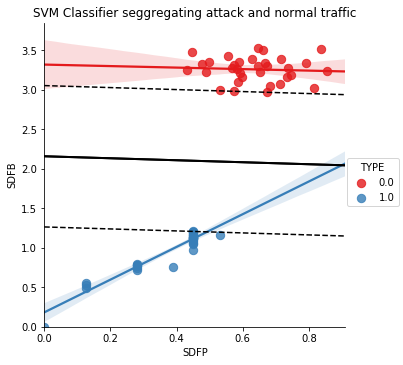

In [23]:
# Visualizing the plot according to the hyperplane
g = sns.lmplot('SDFP', 'SDFB', data=dataset, hue='TYPE', palette='Set1', fit_reg=True, scatter_kws={"s": 70})
g.set(xlim=(0, None),ylim=(0, None))
plt.plot(xx, yy, linewidth=2, color='black');
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');
plt.title("SVM Classifier seggregating attack and normal traffic")

In [114]:

# Create a function to guess when a recipe is a muffin or a cupcake
def attack_segregation(SDFP, SDFB):
    if(model.predict([[SDFP, SDFB]]))==0:
        print('Normal Traffic')
    else:
        print('Attack Traffic')

In [123]:
attack_segregation(38, 75)

Attack Traffic


In [124]:
attack_segregation(12, 53)

Attack Traffic


In [125]:
attack_segregation(53, 299)

Normal Traffic!
